# Machine learning in chemistry

## Atomistic simulation environment (ASE)

The ASE is a set of tools and Python modules for setting up, manipulating, running, visualizing and analyzing atomistic simulations. It is interfaced with many ab initio and MD codes through simple calculators.

More information and manual: https://wiki.fysik.dtu.dk/ase/

For example, it can read and process xyz coordinates. 

FYI: An xyz file contains the cartesian coordinates of the atomic positions of each atom in a molecular system.

Let's start with simple alanine:

```
 13
 
 C    -0.779297    -1.210972     1.994359
 C     0.000000     0.000000     1.460000
 C     1.403962     0.000000     2.015868
 O     2.161436    -0.947142     1.883370
 N    -0.000000    -0.000000    -0.000000
 O     1.837767     0.962613     2.627089
 H     0.423874    -0.764689    -0.525339
 H    -0.501722     0.920815     1.792226
 H    -1.802818    -1.214186     1.591378
 H    -0.834094    -1.175236     3.092412
 H    -0.285041    -2.146224     1.692672
 H     2.730544     0.787839     2.900774
 H    -0.872821     0.015235    -0.504000
```


In [ ]:
#Installation of ase
!pip install ase==3.21.1

     |████████████████████████████████| 2.2 MB 18.9 MB/s 


In [2]:
import ase
import ase.io as aio
from ase.visualize import view
import numpy as np  #The numpy package
import pandas as pd # The pandas data framework
import matplotlib.pyplot as plt # The plotting library
import sklearn as sklearn # General purpose ML framework for python

ModuleNotFoundError: No module named 'ase'

In [ ]:
#!pip install nglview
#import nglview

In [ ]:
# Read xyz for alanine 
alanine = aio.read('./data/alanine.xyz')
#ASE can also visualize molecules
ase.visualize.view(alanine, viewer='x3d')


Ase can easily print information about the position of the elements, atomic numbers, distances between elements, bond angles etc.

In [ ]:
alanine.positions

array([[-0.779297, -1.210972,  1.994359],
       [ 0.      ,  0.      ,  1.46    ],
       [ 1.403962,  0.      ,  2.015868],
       [ 2.161436, -0.947142,  1.88337 ],
       [-0.      , -0.      , -0.      ],
       [ 1.837767,  0.962613,  2.627089],
       [ 0.423874, -0.764689, -0.525339],
       [-0.501722,  0.920815,  1.792226],
       [-1.802818, -1.214186,  1.591378],
       [-0.834094, -1.175236,  3.092412],
       [-0.285041, -2.146224,  1.692672],
       [ 2.730544,  0.787839,  2.900774],
       [-0.872821,  0.015235, -0.504   ]])

In [ ]:
alanine.get_atomic_numbers()

array([6, 6, 6, 8, 7, 8, 1, 1, 1, 1, 1, 1, 1])

## Molecular representations

ML techniques enables to learn the relationships between set of molecules and known target properies, e.g. atomization energies, HOMO, LUMO, electronic densities etc. If the model is trained smartly, it is later able to predict these properties for the molecule which are nor contained in the original set.

In theory, molecules for the training could be represented by any descriptior, for example xyz coordinates, SMILES, number of atoms etc. However, the best molecular representations have some desirable properites as ...

There are many representations designed for the ML. In this tutorial, we will discuss the most popular ones, namely The Coulomb matrix, Bag-of-bonds and SLATM. All these representations are part of a QML toolkit. http://www.qmlcode.org/index.html

In [ ]:
#Installation of Quantum Machine Learning (qml) library 

!pip install qml

     |████████████████████████████████| 41 kB 636 kB/s 
  Created wheel for qml: filename=qml-0.4.0.27-cp37-cp37m-linux_x86_64.whl size=1046977 sha256=03abfbac8386a6739840c4a26efa6fe6728a773efef957e2d5b3770340200520
  Stored in directory: /root/.cache/pip/wheels/e4/6f/cc/cc6ed17565977d62aab6730e348c2e9d8c51c559896c467f74
Successfully built qml




### The Coulomb matrix (CM)

Rupp et al. (2012) Phys Rev Lett https://doi.org/10.1103/PhysRevLett.108.058301

In the CM, structure of the molecule is represented by so called Coulomb matrix **M**, which is defined as 


 $ M_{ij} = \begin{dcases}
        0.5~Z_I^{2.4} & \mathrm{for}~I = J \\
        \frac{Z_IZ_J}{||\mathbf{R}_I - \mathbf{R}_J||} & \mathrm{for}~I \neq J \\
    \end{dcases} $ 
   
where $Z_I$ is a nuclear charge of the atom $I$ in the molecule and $\mathbf{R}_I$ is the set of Cartesian coordinates. The off-diagonal elements therefore correspond to the Coulomb repulsion between atoms I and J, while diagonal elements encode a polynomial fit of atomic energies to nuclear charge.

For the alanine molecule defined above, CM representation has a form (only lower triangular matrix is printed):
```
36.8581052
23.43749732 36.8581052
14.41900445 23.84106728 36.8581052
16.24569179 20.02064702 39.34425504 73.51669472
17.0737     28.76712329 17.09687195 18.54755536 53.3587074
13.87153295 20.16502713 39.34424014 30.84545566 16.72901287 73.51669472
 2.12189506  2.76583189  2.12091545  2.68851906  6.86274675  2.07108902  0.5   
 2.77872448  5.45454693  2.81918672  2.45834253  3.37111687  3.22016937  0.33206726  0.5
 5.45454714  2.75540866  1.7365516   2.00805581  2.59850131  1.83219403  0.32206669  0.39868111  0.5
 5.45454509  2.75540842  2.18376512  2.47038225  2.05174476  2.31657765  0.25959446  0.40179166  0.55962536  0.5
 5.45454468  2.75540822  2.1816791   2.92912333  2.54711145  2.06254654  0.36933897  0.32506637  0.56054284  0.55870726  0.5
 1.44943531  1.88307272  3.3733594   3.82728952  1.72374841  8.42105169  0.22663376  0.29242635  0.19509088  0.24546229  0.22844397  0.5
 2.15468985  2.79165065  1.76671616  2.01055671  6.94444238  1.88308126  0.66079628  0.40062728  0.38441699  0.26395517  0.31874369  0.19930903  0.5       

```



This matrix can be implemented from scratch, for example:

In [ ]:
import numpy as np
import sklearn
from sklearn import metrics

cm = 1 / sklearn.metrics.pairwise_distances(alanine.positions) 
cm *= alanine.get_atomic_numbers() * alanine.get_atomic_numbers()[:, np.newaxis]
cm[np.diag_indices_from(cm)] =  0.5 * alanine.get_atomic_numbers() ** 2.4
cm[np.tril_indices_from(cm)]

/shared-libs/python3.7/py-core/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """


array([36.8581052 , 23.43749732, 36.8581052 , 14.41900445, 23.84106728,
       36.8581052 , 16.24569179, 20.02064702, 39.34425504, 73.51669472,
       17.0737    , 28.76712329, 17.09687195, 18.54755536, 53.3587074 ,
       13.87153295, 20.16502713, 39.34424014, 30.84545566, 16.72901287,
       73.51669472,  2.12189506,  2.76583189,  2.12091545,  2.68851906,
        6.86274675,  2.07108902,  0.5       ,  2.77872448,  5.45454693,
        2.81918672,  2.45834253,  3.37111687,  3.22016937,  0.33206726,
        0.5       ,  5.45454714,  2.75540866,  1.7365516 ,  2.00805581,
        2.59850131,  1.83219403,  0.32206669,  0.39868111,  0.5       ,
        5.45454509,  2.75540842,  2.18376512,  2.47038225,  2.05174476,
        2.31657765,  0.25959446,  0.40179166,  0.55962536,  0.5       ,
        5.45454468,  2.75540822,  2.1816791 ,  2.92912333,  2.54711145,
        2.06254654,  0.36933897,  0.32506637,  0.56054284,  0.55870726,
        0.5       ,  1.44943531,  1.88307272,  3.3733594 ,  3.82

The same matrix could be easily generated by qml toolkit:

In [ ]:
#Import of necessary libraries
import qml
import numpy as np

ALA = qml.Compound(xyz="./data/alanine.xyz")
ALA.generate_coulomb_matrix(size=13, sorting = 'unsorted')

np.set_printoptions(linewidth=100)
print(ALA.representation)

[36.8581052  23.43749732 36.8581052  14.41900445 23.84106728 36.8581052  16.24569179 20.02064702
 39.34425504 73.51669472 17.0737     28.76712329 17.09687195 18.54755536 53.3587074  13.87153295
 20.16502713 39.34424014 30.84545566 16.72901287 73.51669472  2.12189506  2.76583189  2.12091545
  2.68851906  6.86274675  2.07108902  0.5         2.77872448  5.45454693  2.81918672  2.45834253
  3.37111687  3.22016937  0.33206726  0.5         5.45454714  2.75540866  1.7365516   2.00805581
  2.59850131  1.83219403  0.32206669  0.39868111  0.5         5.45454509  2.75540842  2.18376512
  2.47038225  2.05174476  2.31657765  0.25959446  0.40179166  0.55962536  0.5         5.45454468
  2.75540822  2.1816791   2.92912333  2.54711145  2.06254654  0.36933897  0.32506637  0.56054284
  0.55870726  0.5         1.44943531  1.88307272  3.3733594   3.82728952  1.72374841  8.42105169
  0.22663376  0.29242635  0.19509088  0.24546229  0.22844397  0.5         2.15468985  2.79165065
  1.76671616  2.01055671  6.94

### Bag-of-bonds (BoB)

Hansen et al. (2015) J. Phys. Chem. Lett. https://doi.org/10.1021/acs.jpclett.5b00831

Representation BoB contains the same information as CM, but the items of the matrix are group diffrently. 

For alanine:

<img src="./data/bob.png" alt="bob" width="700"/>

1) Used nuclear charges for each Coulomb matrix element, 2) Coulomb matrix entries for alanine sorted into bags, 3) the BoB vector -
obtained by concatenating the bags and adding zeros to allow for dealing with other molecules with larger bags.


In [ ]:
ALA = qml.Compound(xyz="./data/alanine.xyz")
ALA.generate_bob(asize={"O":3, "N":2, "C":4, "H":8})
print(ALA.representation)


[53.3587074   0.          0.         18.54755536 16.72901287  0.          0.          0.
  0.         28.76712329 17.09687195 17.0737      0.          0.          0.          0.
  0.          6.94444238  6.86274675  3.37111687  2.59850131  2.54711145  2.05174476  1.72374841
  0.          0.          0.          0.          0.          0.          0.          0.
  0.         73.51669472 73.51669472  0.         30.84545566  0.          0.         39.34425504
 39.34424014 20.16502713 20.02064702 16.24569179 13.87153295  0.          0.          0.
  0.          0.          0.          8.42105169  3.82728952  3.22016937  2.92912333  2.68851906
  2.47038225  2.45834253  2.31657765  2.07108902  2.06254654  2.01055671  2.00805581  1.88308126
  1.83219403  0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.         36.8581052  36.8581052  36.8581052   0.         23.84106728
 23.43749732 14.41900445  0.          0.          0.          5.454547

### The Spectrum of London and Axillrod-Teller-Muto potential (SLATM)

Huang et al. (2020) Nat. Chem. https://www.nature.com/articles/s41557-020-0527-z

Faber et al. (2018) J. Chem. Phys.  https://aip.scitation.org/doi/pdf/10.1063/1.5020710

<img src="./data/slatm.png" alt="slatm" width="900"/>

In [ ]:
import qml.representations 
from qml.representations import get_slatm_mbtypes

#Read alanine coordinates
coordinates = ALA.coordinates

#Alanine nuclear charges
nuclear_charges = ALA.nuclear_charges

#Generate Many Body types
mbtypes = get_slatm_mbtypes([nuclear_charges])

#Create SLATM reprezentation
rep = generate_slatm(coordinates, nuclear_charges, mbtypes)

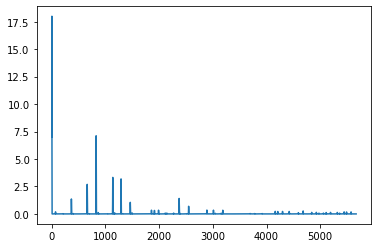

In [ ]:
#Plot all the terms together
fig, ax = plt.subplots()
ax.plot(rep)
plt.show()

## Kernel Ridge Regression

The relations between the chemical properties of system and its structural information are often very complicated and can not be approximated by simple linear function. Therefore, more complex non-linear regression schemes are needed. 

KRR methods use so called kernel, which is a function describing the similarity between two points $x_i$ and $x_j$. Kernel functions are typically symmetric functions (i.e., $f(x,y) = f(y,x)$), for example various polynomials. In this tutorial, we use Gaussian kernel. It is defined as

$K(x_i, x_j) = \mathrm{exp}\left(-\frac{||x_i-x_j||^2}{2\sigma^2}\right).$

The target properties y are then represented as 

$\mathbf{y} = \mathbf{K \alpha}$,

where $\mathbf{K}$ is the  kernel fuction and $\alpha$ are regresion weigths.

In this tutorial, we are going to use KRR to ...

We will use part of QM9 database (Ruddigkeit et al. (2012) J. Chem. Inf. Mod https://pubs.acs.org/doi/abs/10.1021/ci300415d ,
Ramakrishnan et al. (2014) Scientific Data, https://www.nature.com/articles/sdata201422). This database is composed of molecules up to 9 heavy atoms (CHONF) an corresponding harmonic frequencies, dipole moments, polarizabilities, along with energies, enthalpies, and free energies of atomization. All properties were calculated at the B3LYP/6-31G(2df,p) level of theory.

In [1]:
# Import of libraries for data processing
import ase.io as aio
import pandas as pd


ModuleNotFoundError: No module named 'ase'

In [ ]:
qm9_data = pd.read_csv('./data/qm9/qm9.csv', index_col=0)

In [ ]:
qm9_data

,mol_id,A,B,C,mu,alpha,homo,lumo,gap,r2,zpve,u0,u298,h298,g298,cv,u0_atom,u298_atom,h298_atom,g298_atom
0,gdb_1,157.71180,157.70997,157.70699,0.0000,13.21,-0.3877,0.1171,0.5048,35.3641,0.044749,-40.478930,-40.476062,-40.475117,-40.498597,6.469,-395.999595,-398.643290,-401.014647,-372.471772
40,gdb_41,28.29567,4.14901,3.88349,1.0363,39.34,-0.2503,0.0925,0.3428,368.9331,0.107895,-194.254127,-194.248585,-194.247641,-194.281899,17.888,-1033.537443,-1040.724304,-1047.245378,-960.716279
80,gdb_81,7.57282,3.52550,2.65861,1.3149,49.26,-0.2629,0.0789,0.3418,516.4357,0.136209,-233.551389,-233.544542,-233.543598,-233.581067,23.924,-1315.881353,-1324.915600,-1333.215034,-1221.758140
120,gdb_121,23.52902,2.22059,2.10822,0.7752,51.47,-0.2586,0.0583,0.3169,593.0141,0.112736,-195.186228,-195.179881,-195.178937,-195.215412,22.023,-1223.758012,-1231.329535,-1238.442977,-1142.951795
160,gdb_161,7.86090,7.51415,4.27374,1.3482,38.20,-0.2572,0.0865,0.3437,333.7970,0.092697,-268.273739,-268.269015,-268.268071,-268.302293,15.172,-1005.662866,-1012.474476,-1018.401926,-937.320233
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119800,gdb_119801,5.18877,0.77713,0.73183,1.4981,85.16,-0.2182,0.0249,0.2430,1588.0913,0.183310,-387.085726,-387.076837,-387.075892,-387.119935,33.679,-2035.447806,-2048.534506,-2060.388778,-1894.288401
119840,gdb_119841,3.94552,0.86721,0.78294,1.5307,89.12,-0.2233,0.0231,0.2464,1564.3717,0.195351,-367.204385,-367.195422,-367.194478,-367.238669,34.122,-2097.636458,-2111.565275,-2124.013171,-1949.786552
119880,gdb_119881,3.19361,0.95220,0.76937,2.1015,82.56,-0.2256,0.0249,0.2504,1526.9923,0.180804,-424.221164,-424.211275,-424.210331,-424.256765,35.025,-1983.760517,-1996.219081,-2008.073981,-1843.218581
119920,gdb_119921,2.10725,1.32493,0.99001,5.1853,79.75,-0.2588,0.0200,0.2788,1277.2733,0.169950,-403.150108,-403.140083,-403.139139,-403.185930,35.924,-1927.243919,-1938.728589,-1949.990493,-1793.474060


In [ ]:
ase_mols = [aio.read('data/qm9/qm9_xyz/' + mol + '.xyz') for mol in qm9_data.mol_id]

## Kernels for molecules

### The Coulomb matrix

In [ ]:

for mol in ase_mols:

    mol.generate_coulomb_matrix(size=23, sorting="row-norm")

Atoms(symbols='CH4', pbc=False)

### Bob

### SLATM

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=9c5b533d-8121-454d-9fa0-cbfc9a47c2e1' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>